In [ ]:
# default_exp demassey_test

# Testing the Demassey-Code

This notebook contains test code for the Demassey instances that were introduced in:
- Demassey, Sophie, Gilles Pesant, and Louis-Martin Rousseau. 2005. Constraint Programming Based Column Generation for Employee Timetabling. In Integration of AI and OR Techniques in Constraint Programming for Combinatorial Optimization Problems, ed. Roman Barták and Michela Milano, 140–154. Lecture Notes in Computer Science. Berlin, Heidelberg: Springer. https://doi.org/10.1007/11493853_12.

They are used in many other publications, as well.


In [ ]:
#hide
from nbdev.showdoc import *

In [ ]:

import os

import numpy as np

from personnel_scheduling.data_structures import *

import personnel_scheduling.demassey as demassey
from personnel_scheduling.reporting import *

from collections import namedtuple

from box import Box
from dataclasses import dataclass, field

In [ ]:
## This is some old code, right now just kept for reference

## read instance
def read_instance(filename):

    
    with open(filename) as f:
        instance =  Box({'number_of_periods' : int(f.readline()), \
                         'max_work_periods_per_shift' : int(f.readline()), \
                         'number_of_days_in_horizon' : int(f.readline()), \
                         'is_continous' : int(f.readline()), \
                         'instance_version' : int(f.readline()), \
                         'meaningless_parameter' : int(f.readline()), \
                         'number_of_employees' : int(f.readline()[5:]), \
                         'skills' : ([int(n) for n in f.readline()[:-1].split()]), \
                         'number_of_activities' : int(f.readline()[4:])
        })

      
        line_ints = [int(n) for n in f.readline()[:-1].split()]
        
        instance.min_cons_periods = line_ints[0]
        instance.max_cons_periods = line_ints[1]
        instance.cost_per_activity_assignment = line_ints[2]
 
        instance.activity_data = []
        for act in range(instance.number_of_activities):
            instance.activity_data.append( Box())
            instance.activity_data[act].demand = ([int(n) for n in f.readline()[:-1].split()])
            instance.activity_data[act].over_covering_cost = ([int(n) for n in f.readline()[:-1].split()])
            instance.activity_data[act].under_covering_cost = ([int(n) for n in f.readline()[:-1].split()])
            instance.activity_data[act].demand_2 = ([int(n) for n in f.readline()[:-1].split()])
            f.readline()
        return instance

    def read_instance_demassey_new(filename):
        with open(filename) as f:
            instance =  Box({'number_of_periods' : 96, \
                             'max_work_periods_per_shift' : 32, \
                             'number_of_days_in_horizon' : 1, \
                             'is_continous' : 1, \
                             'instance_version' : 1, \
                             'meaningless_parameter' : 1, \
                             'number_of_employees' : int(f.readline()[5:]), \
                             'skills' : ([int(n) for n in f.readline()[:-1].split()]), \
                             'number_of_activities' : int(f.readline()[4:])
            })


            line_ints = [int(n) for n in f.readline()[:-1].split()]

            instance.min_cons_periods = line_ints[0]
            instance.max_cons_periods = line_ints[1]
            instance.cost_per_activity_assignment = line_ints[2]

            instance.activity_data = []
            for act in range(instance.number_of_activities):
                instance.activity_data.append( Box())
                instance.activity_data[act].demand = ([int(n) for n in f.readline()[:-1].split()])
                instance.activity_data[act].over_covering_cost = ([20 for n in range(96)])
                instance.activity_data[act].under_covering_cost = ([100 for n in range(96)])
                f.readline()
            return instance



## Instance: shoe_1_3_1_9

Info: Activities: 3, Employees: 6, ⌀ Workhours: 6.33

## Demand:

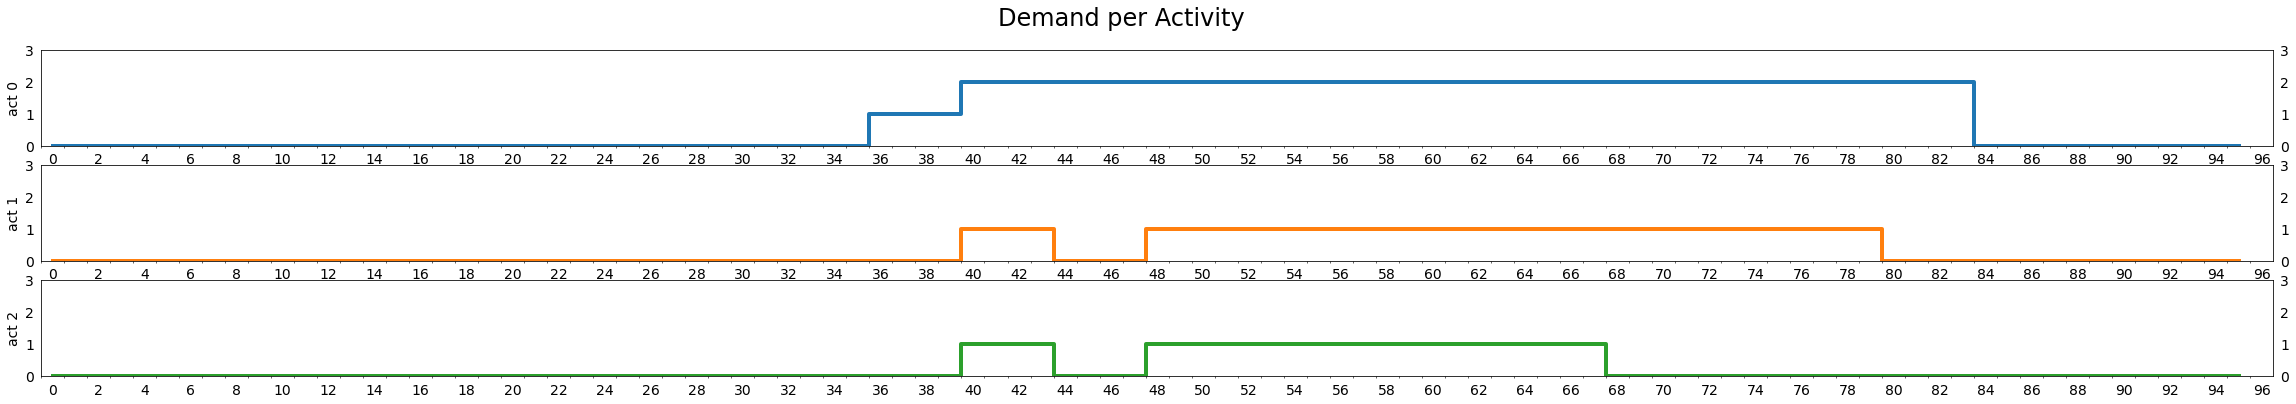

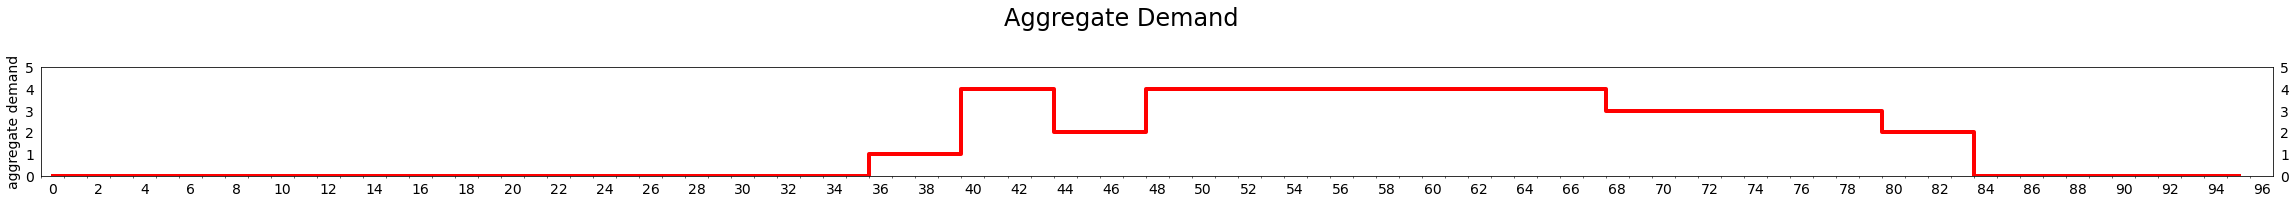

In [ ]:
#instance = read_instance("./instances/demassey/shoe_1_3_1_9.txt")

instance = DemasseyInstance("./instances/demassey/shoe_1_3_1_9.txt")

instance_report(instance)

## Testing the Ruleset and the Reporting

Let us try by reading a solution from a file:

In [ ]:
instance = demassey.DemasseyInstance("./instances/demassey/shoe_1_3_1_9.txt")

rule_set = demassey.RuleSet(instance)

shift_schedule = ShiftSchedule.from_file("test_data/shoe_1_3_1_9_sol.csv")

evaluation_result = evaluate_shift_schedule(shift_schedule, rule_set)

display_evaluation_results(evaluation_result)


### Feasible Solution with objective: 2450

### Grouped Penalties:

C:\Users\Michael\git-projects\personnel_scheduling\personnel_scheduling\data_structures.py:360: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  return pd.DataFrame(self.penalties).groupby(['rule'])['penalty'].sum().reset_index().style.hide_index()


rule,penalty
ActivityCostPerPeriod,2250
UnderCovering,200


### The full solution report

## Instance: shoe_1_3_1_9

Info: Activities: 3, Employees: 6, ⌀ Workhours: 6.33

### Feasible Solution with objective: 2450

### Grouped Penalties:

C:\Users\Michael\git-projects\personnel_scheduling\personnel_scheduling\data_structures.py:360: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  return pd.DataFrame(self.penalties).groupby(['rule'])['penalty'].sum().reset_index().style.hide_index()


rule,penalty
ActivityCostPerPeriod,2250
UnderCovering,200


## Shift Schedule:

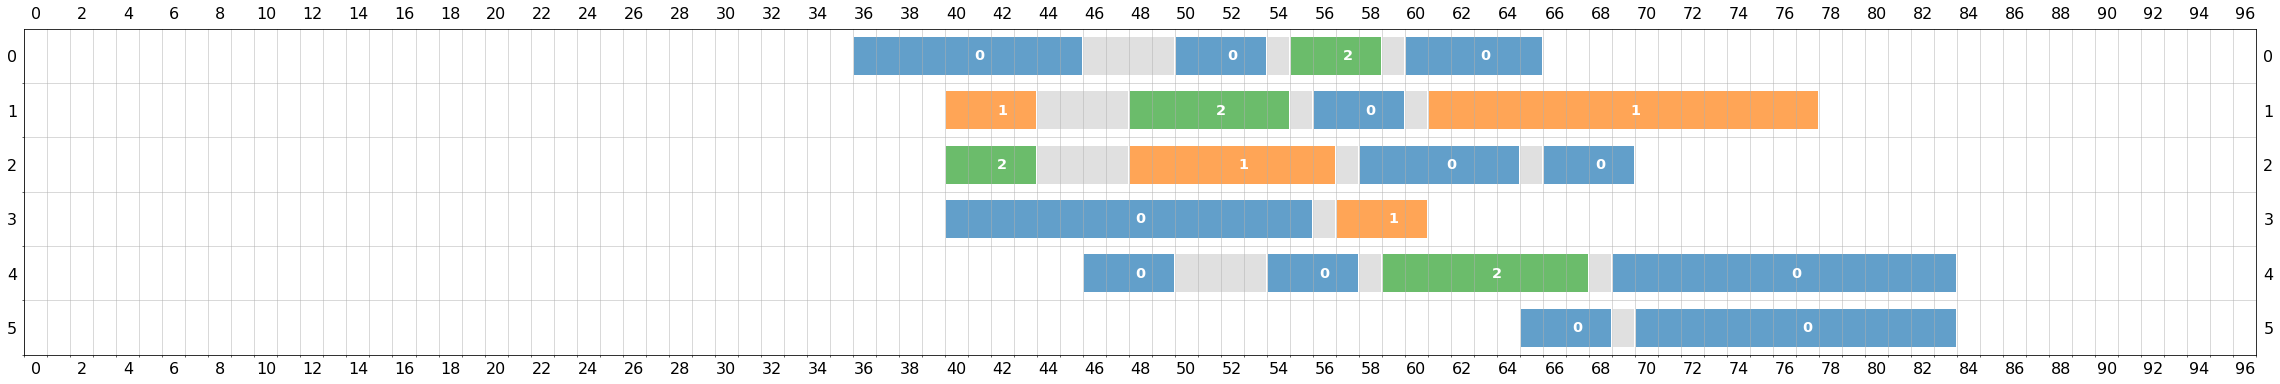

## Demands and Cover

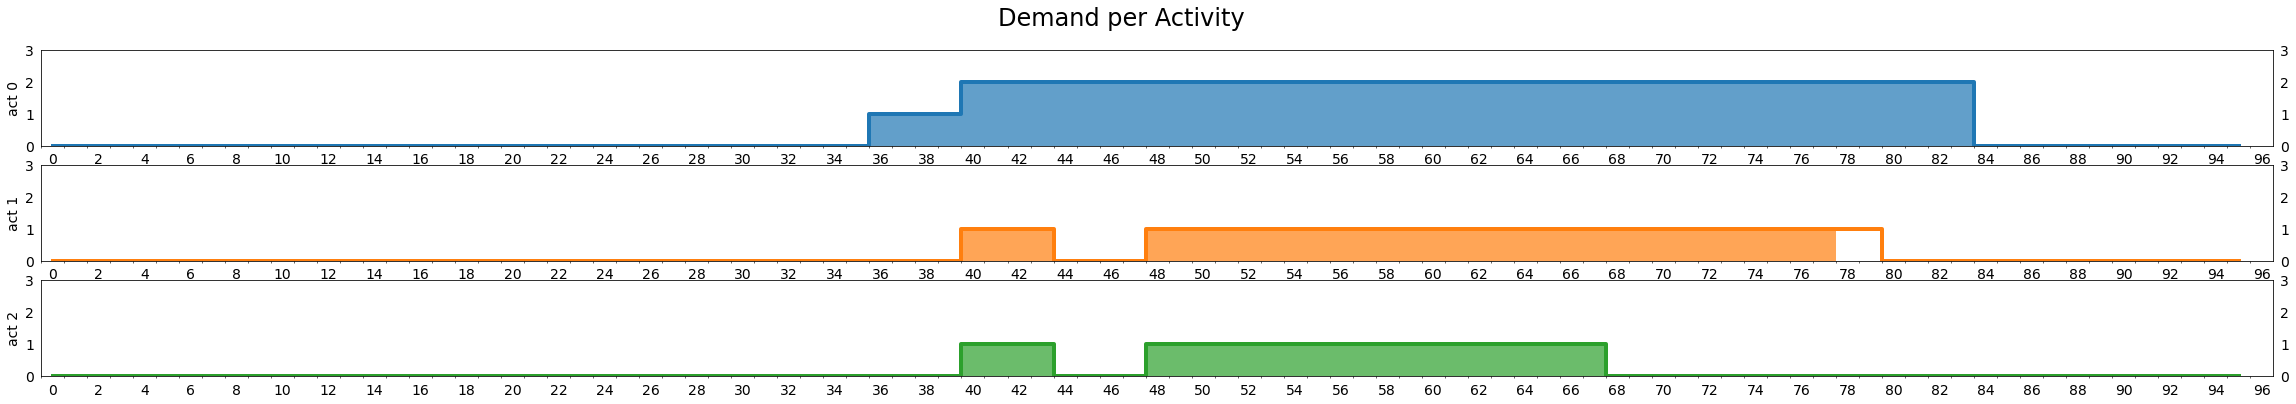

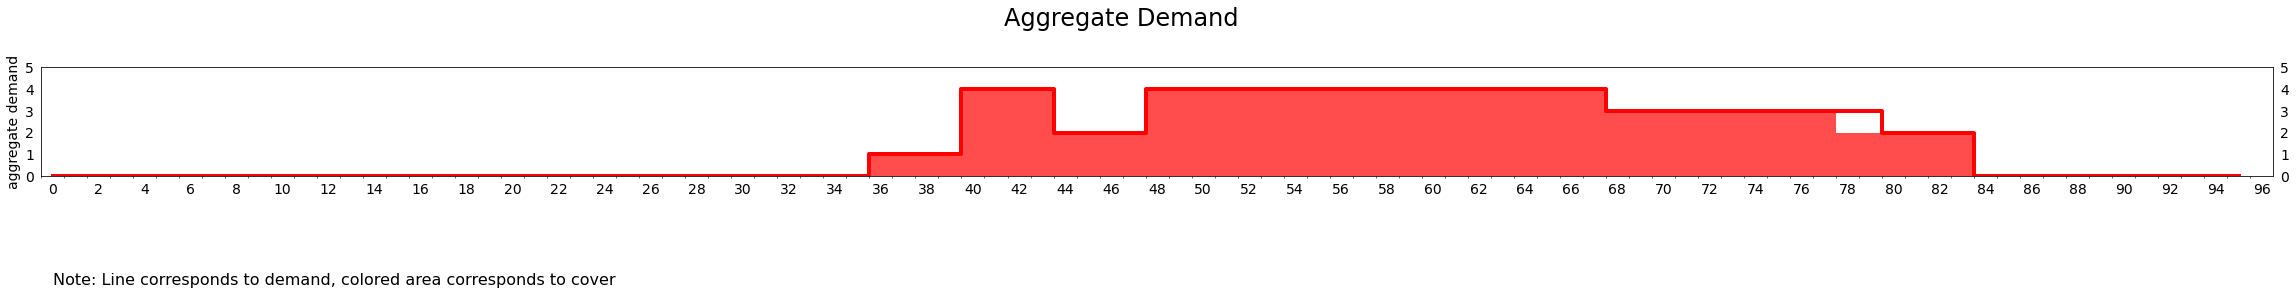

In [ ]:
instance_solution_report(instance, rule_set, shift_schedule)

## Exporting

In [ ]:


#hide
from nbdev.export import *
notebook2script()



Converted 00_data_stuctures.ipynb.
Converted 00_reporting.ipynb.
Converted 01_demassey.ipynb.
Converted 01a_demassey_test.ipynb.
Converted 02_dahmen.ipynb.
Converted 02a_dahmen_test.ipynb.
Converted index.ipynb.
